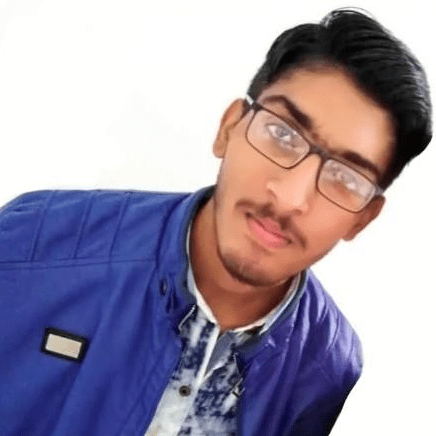

**Created by Muhammad Hanan Asghar**

**Regression Using Keras**
Regression is used where if data is continous.

**Dataset URL :  https://archive.ics.uci.edu/ml/machine-learning-databases/housing/**

**Let's First Upload the File in Colab**

In [7]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving housing.data to housing.data
User uploaded file "housing.data" with length 49082 bytes


**Preparing Dataset**

In [62]:
import pandas as pd

names = ['crim','zn','indus','chas','nox','rm','age','dis','rad','tax','ptratio','black','lstat','medv']

URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"

df = pd.read_csv(URL, delim_whitespace = True, names = names)
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [63]:
# Information about Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    float64
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [64]:
summary = df.describe()
summary = summary.transpose()
summary

,count,mean,std,min,25%,50%,75%,max
crim,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677082,88.9762
zn,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
indus,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
chas,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
nox,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
rm,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
age,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
dis,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
rad,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
tax,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


**Data PreProcessing**

In [65]:
# Standard Scaling
from sklearn.preprocessing import StandardScaler


sc = StandardScaler()

sc_df = sc.fit_transform(df)
dataframe = pd.DataFrame(sc_df, columns = names)

In [66]:
sc_df

array([[-0.41978194,  0.28482986, -1.2879095 , ...,  0.44105193,
        -1.0755623 ,  0.15968566],
       [-0.41733926, -0.48772236, -0.59338101, ...,  0.44105193,
        -0.49243937, -0.10152429],
       [-0.41734159, -0.48772236, -0.59338101, ...,  0.39642699,
        -1.2087274 ,  1.32424667],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  0.44105193,
        -0.98304761,  0.14880191],
       [-0.40776407, -0.48772236,  0.11573841, ...,  0.4032249 ,
        -0.86530163, -0.0579893 ],
       [-0.41500016, -0.48772236,  0.11573841, ...,  0.44105193,
        -0.66905833, -1.15724782]])

In [67]:
dataframe

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,0.159686
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,-0.101524
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,1.324247
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,1.182758
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,1.487503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.413229,-0.487722,0.115738,-0.272599,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.418147,-0.014454
502,-0.415249,-0.487722,0.115738,-0.272599,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850,-0.210362
503,-0.413447,-0.487722,0.115738,-0.272599,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048,0.148802
504,-0.407764,-0.487722,0.115738,-0.272599,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.865302,-0.057989


In [68]:
# Standard Scaler is [-1,1]
# MinMaxScaler is [0,1]
# MinMaxScailing
from sklearn.preprocessing import MinMaxScaler


mn = MinMaxScaler()

mn_df = mn.fit_transform(df)
mn_dataframe = pd.DataFrame(mn_df, columns = names)

In [69]:
mn_dataframe

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,0.422222
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,0.368889
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,0.660000
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389,0.631111
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338,0.693333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.000633,0.00,0.420455,0.0,0.386831,0.580954,0.681771,0.122671,0.000000,0.164122,0.893617,0.987619,0.219095,0.386667
502,0.000438,0.00,0.420455,0.0,0.386831,0.490324,0.760041,0.105293,0.000000,0.164122,0.893617,1.000000,0.202815,0.346667
503,0.000612,0.00,0.420455,0.0,0.386831,0.654340,0.907312,0.094381,0.000000,0.164122,0.893617,1.000000,0.107892,0.420000
504,0.001161,0.00,0.420455,0.0,0.386831,0.619467,0.889804,0.114514,0.000000,0.164122,0.893617,0.991301,0.131071,0.377778


In [70]:
summary_mn = mn_dataframe.describe()
summarry = summary_mn.transpose()
summarry

,count,mean,std,min,25%,50%,75%,max
crim,506.0,0.040544,0.096679,0.0,0.000851,0.002812,0.041258,1.0
zn,506.0,0.113636,0.233225,0.0,0.000000,0.000000,0.125000,1.0
indus,506.0,0.391378,0.251479,0.0,0.173387,0.338343,0.646628,1.0
chas,506.0,0.069170,0.253994,0.0,0.000000,0.000000,0.000000,1.0
nox,506.0,0.349167,0.238431,0.0,0.131687,0.314815,0.491770,1.0
rm,506.0,0.521869,0.134627,0.0,0.445392,0.507281,0.586798,1.0
age,506.0,0.676364,0.289896,0.0,0.433831,0.768280,0.938980,1.0
dis,506.0,0.242381,0.191482,0.0,0.088259,0.188949,0.369088,1.0
rad,506.0,0.371713,0.378576,0.0,0.130435,0.173913,1.000000,1.0
tax,506.0,0.422208,0.321636,0.0,0.175573,0.272901,0.914122,1.0


**Visualization**

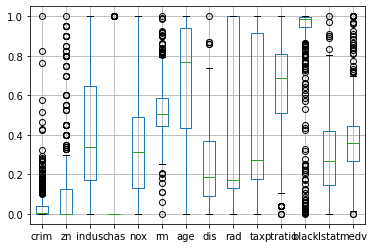

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt


mn_dataframe.boxplot(column = names)
plt.show()

**Spliting Dataset**

In [72]:
from sklearn.model_selection import train_test_split

X = mn_dataframe.iloc[:,:-1].values
Y = mn_dataframe.iloc[:, -1].values

X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

**Making ANN**

In [73]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [74]:
# Input Layer and First Hidden Layer

model = Sequential()


model.add(
    Dense(
        round(int(len(df.columns)) / 2),
        input_dim = int(len(df.columns[:-1])),
        activation = "relu",
        kernel_initializer = "random_uniform"
    )
)

# Second Hidden Layer
model.add(
    Dense(
        round(int(len(df.columns)) / 2),
        activation = "relu",
        kernel_initializer = "random_uniform"
    )
)

# Ouput Layer
# For linear regression use linear
model.add(
    Dense(
        1,
        activation = "linear",
        kernel_initializer = "random_uniform"
    )
)


# Compile
# for linear regression use mean_squared_error
model.compile(optimizer="Adam", loss="mean_squared_error", metrics = ["accuracy"])

**Let's Train Our ANN**

In [75]:
# verbose for epochs visualization
model.fit(X_train,y_train,epochs=1000,verbose=1)

Epoch 1/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1893 - accuracy: 0.0050
Epoch 2/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1752 - accuracy: 0.0050
Epoch 3/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1572 - accuracy: 0.0050
Epoch 4/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1345 - accuracy: 0.0050
Epoch 5/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1062 - accuracy: 0.0050
Epoch 6/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0786 - accuracy: 0.0050
Epoch 7/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0592 - accuracy: 0.0050
Epoch 8/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0519 - accuracy: 0.0050
Epoch 9/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0497 - accuracy: 0.0050
Epoch 10/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0468 - accuracy: 0.0050

In [76]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 7)                 98        
_________________________________________________________________
dense_14 (Dense)             (None, 7)                 56        
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 8         
Total params: 162
Trainable params: 162
Non-trainable params: 0
_________________________________________________________________


In [83]:
y_pred = model.predict(X_test)
# evaluation
sc = model.evaluate(X_test,y_test,verbose = 0)

In [91]:
# Hidding Warnings
import warnings
warnings.filterwarnings('ignore')

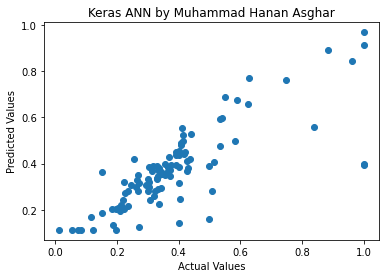

In [92]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Keras ANN by Muhammad Hanan Asghar")
plt.show()

Text(0.5, 1.0, 'Keras ANN by Muhammad Hanan Asghar')

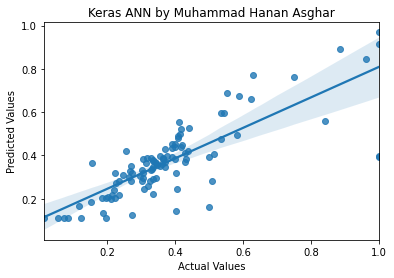

In [93]:
sns.regplot(y_test,y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Keras ANN by Muhammad Hanan Asghar")